# Data import



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark import RDD
from pyspark import SparkContext
from src.analysis_functions import is_numeric
import src.plot_func as plot_func
%matplotlib inline

analysis_songs_rdd=sc.pickleFile("data/analysis-songs")

music_brainz_rdd=sc.pickleFile("data/musicbrainz-songs")
year = music_brainz_rdd.map(lambda x: (x[0], x[1]['year'][0])).filter(lambda x: not (int(x[1]) == 0))

metadata_songs_rdd=sc.pickleFile("data/metadata-songs")
hotness=metadata_songs_rdd.map(lambda x: (x[0], x[1]['song_hotttnesss'][0])).filter(lambda x: is_numeric(x[1]))

In [2]:
s=metadata_songs_rdd.collect()
s[0]

('TRAGYML128F4286683',
 array([ ('', 165792,  0.56151621,  0.40095212, 'ARHYNR9119B8668FA3',  nan, '',  nan, '9f3d2785-d2f4-4631-8599-63e5aa0b6ddb', 'The Oh Sees', -1, '', 0, 0, 'Thee Oh Sees Sucks Blood', 219160,  0.57972875, 'SOVKBMW12A8C140754', 'It Killed Mom', 2390865)],
       dtype=[('analyzer_version', 'S32'), ('artist_7digitalid', '<i4'), ('artist_familiarity', '<f8'), ('artist_hotttnesss', '<f8'), ('artist_id', 'S32'), ('artist_latitude', '<f8'), ('artist_location', 'S1024'), ('artist_longitude', '<f8'), ('artist_mbid', 'S40'), ('artist_name', 'S1024'), ('artist_playmeid', '<i4'), ('genre', 'S1024'), ('idx_artist_terms', '<i4'), ('idx_similar_artists', '<i4'), ('release', 'S1024'), ('release_7digitalid', '<i4'), ('song_hotttnesss', '<f8'), ('song_id', 'S32'), ('title', 'S1024'), ('track_7digitalid', '<i4')]))

In [3]:
s=analysis_songs_rdd.collect()
s[0]

('TRAGYML128F4286683',
 array([ (22050, '757652db75637db68c3089350339f998',  0.,  162.37669,  0.,  0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,  0.473, -6.111, 0,  0.469,  153.31,  100.928, 4,  0., 'TRAGYML128F4286683')],
       dtype=[('analysis_sample_rate', '<i4'), ('audio_md5', 'S32'), ('danceability', '<f8'), ('duration', '<f8'), ('end_of_fade_in', '<f8'), ('energy', '<f8'), ('idx_bars_confidence', '<i4'), ('idx_bars_start', '<i4'), ('idx_beats_confidence', '<i4'), ('idx_beats_start', '<i4'), ('idx_sections_confidence', '<i4'), ('idx_sections_start', '<i4'), ('idx_segments_confidence', '<i4'), ('idx_segments_loudness_max', '<i4'), ('idx_segments_loudness_max_time', '<i4'), ('idx_segments_loudness_start', '<i4'), ('idx_segments_pitches', '<i4'), ('idx_segments_start', '<i4'), ('idx_segments_timbre', '<i4'), ('idx_tatums_confidence', '<i4'), ('idx_tatums_start', '<i4'), ('key', '<i4'), ('key_confidence', '<f8'), ('loudness', '<f8'), ('mode', '<i4'), ('mode_confidence', '<f8')

In [4]:
genre_rdd=sc.pickleFile("data/metadata-artist_terms/")
s=genre_rdd.collect()
s[0]

('TRAGYML128F4286683',
 array(['noise pop', 'garage rock', 'stoner rock', 'blues', 'garage',
        'indie rock', 'indie', 'psychedelic', 'lo-fi', '00s', 'rock',
        'trippy', '60s', 'psychedelic folk', "rock 'n roll", 'pitchfork',
        'fuzzy', 'revival'],
       dtype='|S256'))

In [5]:
s=music_brainz_rdd.collect()
s[0]

('TRAGYML128F4286683', array([(0, 0)],
       dtype=[('idx_artist_mbtags', '<i4'), ('year', '<i4')]))

In [6]:
rdd=sc.pickleFile('data/metadata-songs')

# Data analysis
In order to get a better grasp of the characteristics of a summer hit, we order our songs realease mont and year, and compare the features between:
- The summer songs (between May and August) and the other songs of a same year
- The summer songs of each year

The considered features would be :

__analysis-song__

- danceability
- duration
- energy
- key
- loudness
- mode (Maj/min)
- tempo
- time signature (beats per measure) 

__other files__
- artiste longitude/latitude
- lyrics (sentiment analysis ?)
- language
- artist hotness
- genre (other dataset ? )

The success of each song will be evaluated with the song hotness feature and its ranking in the billboard ranking of summer hits 

https://www.billboard.com/articles/news/513524/summer-songs-1985-present-top-10-tunes-each-summer-listen

http://docs.7digital.com/#standard-response-objects_Release


In [7]:
def rdd_to_df(rdd,name_feature,keep_zero_feat=True,numeric=False):
    if numeric:
        feat=rdd.map(lambda x: (x[0], x[1][name_feature][0])).filter(lambda x: is_numeric(x[1]))
    else:
        feat=rdd.map(lambda x: (x[0], x[1][name_feature][0]))
    joined=feat.join(year).join(hotness)
    lst=joined.collect()
    feature_lst=[]
    year_lst=[]    
    hotness_lst=[]
    for song in lst:
        if song[1][0][0] !=0 or keep_zero_feat==True:
            feature_lst.append(song[1][0][0])
            year_lst.append(song[1][0][1])
            hotness_lst.append(song[1][1])
    df=pd.DataFrame()
    df['Year']=year_lst
    df[name_feature]=feature_lst
    df['Hotness']=hotness_lst
    df['is_hot']=df.Hotness>is_hot_threshold
    return df

# Feature overview
From the Millonsong documentation, we found that the tracks had been chosen amongst the most "familiar" artists according to The Echo Nest, and some extreme songs according to the features defined by The Echo Nest. To get a grasp of these features, we will plot them by year for the subset.
VIOLIN PLOT

In [8]:
name_feature='loudness'
data_feature=analysis_songs_rdd
is_discrete=False
is_hot_threshold=0.7
keep_zero_feat=True
number_discrete_feat=3
export=False

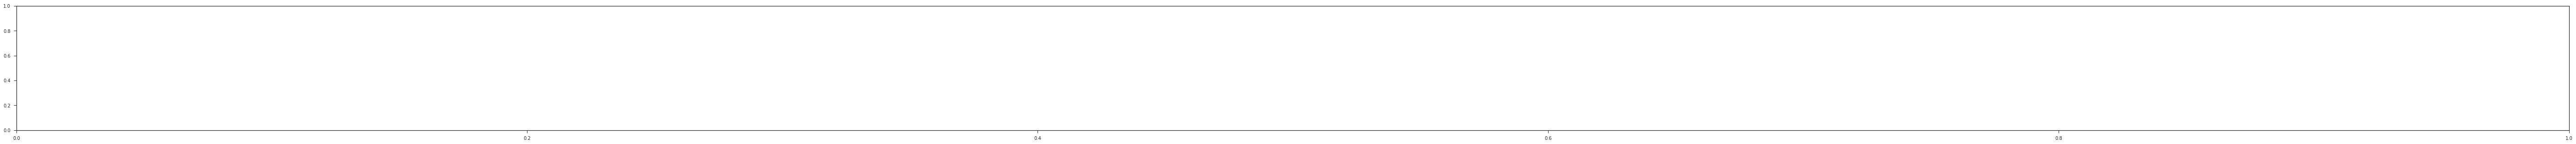

In [9]:
feat=data_feature.map(lambda x: (x[0], x[1][name_feature][0])).filter(lambda x: is_numeric(x[1]))

joined=feat.join(year).join(hotness)
lst=joined.collect()
feature_lst=[]
year_lst=[]    
hotness_lst=[]
for song in lst:
    if song[1][0][0] !=0 or keep_zero_feat==True:
        feature_lst.append(song[1][0][0])
        year_lst.append(song[1][0][1])
        hotness_lst.append(song[1][1])

df=pd.DataFrame()
df['Year']=year_lst
df[name_feature]=feature_lst
df['Hotness']=hotness_lst
df['is_hot']=df.Hotness>is_hot_threshold
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(100, 5)
yearSpan=df.Year.max()-df.Year.min()

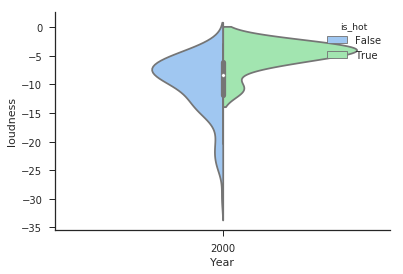

In [11]:
ax=fig.add_subplot(yearSpan,1,1)
y=2000
sns.violinplot( x='Year', 
                        y=name_feature,
                        hue='is_hot',
                        data=df[df.Year==y],
                        split=True)
sns.despine()


In [12]:
df=rdd_to_df(analysis_songs_rdd,'key')
df['Year_cp']=df.Year
gby=df.groupby('Year')
t=gby['key'].value_counts()
v=t[2000].nlargest(n=2)
v

key
7    19
0    14
Name: key, dtype: int64

In [13]:
v.index[0]

7

In [14]:
s=pd.DataFrame()
s=s.append(v.index)


TypeError: cannot concatenate a non-NDFrame object

In [15]:
def get_n_most_common(df,name_feature,n=1):
    df['Year_cp']=df.Year
    gby=df.groupby('Year')
    t=gby[name_feature].value_counts()
    year_idx=t.index.levels[0]
    s=pd.Series(index=year_idx)
    for idx in year_idx:
        v=t[idx].nlargest(n=n)
        s[idx]=v.index[0]
    return s

In [16]:
df=rdd_to_df(analysis_songs_rdd,'key')
s1=get_n_most_common(df,'key')
s2=get_n_most_common(df[df.Hotness>0.7],'key')
pd.concat([s1,s2],axis=1)

/home/paul/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,0,1
Year,,
1954,11.0,NaN
1956,0.0,NaN
1957,0.0,NaN
1959,0.0,NaN
1960,7.0,NaN
1961,0.0,NaN
1962,0.0,3.0
1963,0.0,NaN
1964,2.0,1.0


In [17]:
feat=genre_rdd.map(lambda x: (x[0], x[1]))
lst=feat.collect()

In [18]:
lst[0][1][1]

'garage rock'

In [19]:
joined=feat.join(year).join(hotness)
lst=joined.collect()
feature_lst=[]
year_lst=[]    
hotness_lst=[]

In [20]:
for song in lst:
        if song[1][0][0] !=0 or keep_zero_feat==True:
            feature_lst.append(song[1][0][0])
            year_lst.append(song[1][0][1])
            hotness_lst.append(song[1][1])
df=pd.DataFrame()
df['Year']=year_lst
df[name_feature]=feature_lst
df['Hotness']=hotness_lst
df['is_hot']=df.Hotness>is_hot_threshold
df


/home/paul/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


,Year,loudness,Hotness,is_hot
0,1992,"[grunge, alternative metal, heavy metal, hard ...",0.818394,True
1,2007,"[cool jazz, smooth jazz, jazz fusion, bossa no...",0.484563,False
2,2006,"[samba, bossa nova, soft rock, latin jazz, bra...",0.215080,False
3,1972,"[art rock, classic rock, hard rock, rock, pop,...",0.793471,True
4,2006,"[garage rock, hard rock, rock, punk, rock 'n r...",0.266955,False
5,2007,"[groove metal, alternative metal, melodic hard...",0.525497,False
6,2007,"[celtic rock, folk, irish folk, jig, country r...",0.382935,False
7,1990,"[glam metal, hard rock, heavy metal, country r...",0.558237,False
8,1986,"[soft rock, blues-rock, pop rock, country rock...",0.767728,True
9,2009,"[future jazz, electro, trip rock, roots reggae...",0.000000,False


In [33]:
hotness=metadata_songs_rdd.map(lambda x: (x[0], x[1]['song_hotttnesss'][0])).filter(lambda x: is_numeric(x[1]))
year=music_brainz_rdd.map(lambda x: (x[0], x[1]['year'][0])).filter(lambda x: not (int(x[1]) == 0))
#feat=analysis_songs_rdd.map(lambda x: (x[0], x[1]['loudness'][0])).filter(lambda x: is_numeric(x[1]))
plot_func.plot_continuous_feat(analysis_songs_rdd,year,hotness,'loudness')

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 26.0 failed 1 times, most recent failure: Lost task 2.0 in stage 26.0 (TID 174, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark-1.6.3/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/opt/spark-1.6.3/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/spark-1.6.3/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "src/plot_func.py", line 10, in <lambda>
    feat=data_feature_rdd.map(lambda x: (x[0], x[1][name_feature][0])).filter(lambda x: is_numeric(x[1]))
TypeError: 'bool' object is not callable

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.rdd.UnionRDD.compute(UnionRDD.scala:87)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.api.python.PairwiseRDD.compute(PythonRDD.scala:342)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1431)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1419)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1418)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1418)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1640)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1599)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1588)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:620)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1832)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1845)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1858)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1929)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:927)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:926)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:405)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark-1.6.3/python/lib/pyspark.zip/pyspark/worker.py", line 111, in main
    process()
  File "/opt/spark-1.6.3/python/lib/pyspark.zip/pyspark/worker.py", line 106, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/spark-1.6.3/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "src/plot_func.py", line 10, in <lambda>
    feat=data_feature_rdd.map(lambda x: (x[0], x[1][name_feature][0])).filter(lambda x: is_numeric(x[1]))
TypeError: 'bool' object is not callable

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:166)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:207)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:125)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.rdd.UnionRDD.compute(UnionRDD.scala:87)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.api.python.PairwiseRDD.compute(PythonRDD.scala:342)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:306)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:270)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:73)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:41)
	at org.apache.spark.scheduler.Task.run(Task.scala:89)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:227)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


In [ ]:
plot_feature_by_year(analysis_songs_rdd,year,hotness,'mode',is_discrete=True)
    